 **Employee Turnover Analytics**
 ---------------------------------------------------------------------
 Submitted by:
 * Shyamala Gowri V.G.
 * get2shyamala@gmai.com



**Problem Statement :**
----------------------------------------------------

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details including the number of projects they worked upon, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level.
Data from prior evaluations show the employee’s satisfaction at the workplace. The data could be used to identify patterns in work style and their interest to continue to work in the company.
The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain time period.

### Importing the required library

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score,cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression

#### Loading the google drive to access the dataset

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
cd drive/MyDrive/Simplilearn/csv

/content/drive/MyDrive/Simplilearn/csv


## Understanding the data

In [4]:
ls

311_Service_Requests_from_2010_to_Present.csv  IRIS.csv               rental_bike_season.csv
Advertising.csv                                melb_data.csv          titanic_test.csv
final_rental_bike_dataset.csv                  melb_data.csv.zip      titanic_train.csv
House_price_feature_Scaling.csv                movies.dat             users.dat
housing_data.csv                               ratings.dat
HR_comma_sep.csv                               rental_bike_descr.csv


1.1 Import the dataset

In [5]:
df_hr=pd.read_csv('HR_comma_sep.csv')

In [6]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df_hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [9]:
count=0
for column in df_hr.columns:
  if df_hr[column].isna().sum()>0:
    print("%-30s %-3d" %(column,df_hr[column].isna().sum()))
    count=count+1
print(f'There are totally {count} columns with null values')

There are totally 0 columns with null values


#### There are no null values in the data.

In [10]:
df_hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [11]:
df_hr['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [12]:
df_hr['satisfaction_level'].value_counts()

0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: satisfaction_level, Length: 92, dtype: int64

In [13]:
df_hr['last_evaluation'].value_counts()

0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
       ... 
0.39     52
0.43     50
0.38     50
0.44     44
0.36     22
Name: last_evaluation, Length: 65, dtype: int64

In [14]:
df_hr['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [15]:
df_hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [16]:
df_hr['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

### 2. Understand what factors contributed most to employee turnover by EDA.
        2.1. Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.

In [17]:
df_hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [18]:
numerical_cols = df_hr.select_dtypes(include=['number'])


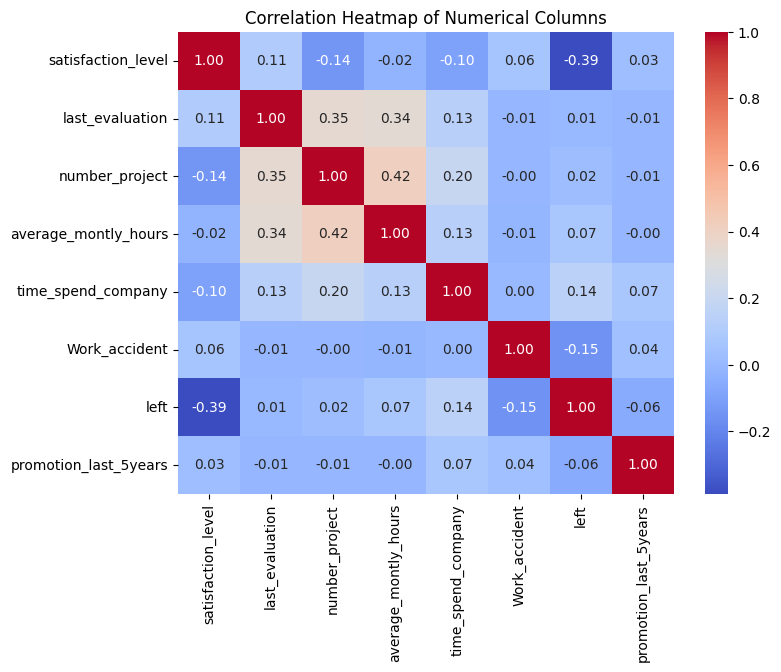

In [19]:
corr_matrix = numerical_cols.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

### We see that the relation between column is less , but observed is that
* left and satisfaction_level has -ve correlation
* work_accident and left has -ve correlation

2.2. Draw the distribution plot of

    ▪ Employee Satisfaction (use column satisfaction_level)
    ▪ Employee Evaluation (use column last_evaluation)
    ▪ Employee Average Monthly Hours (use column average_montly_hours)

####Employee Satisfaction (use column satisfaction_level)

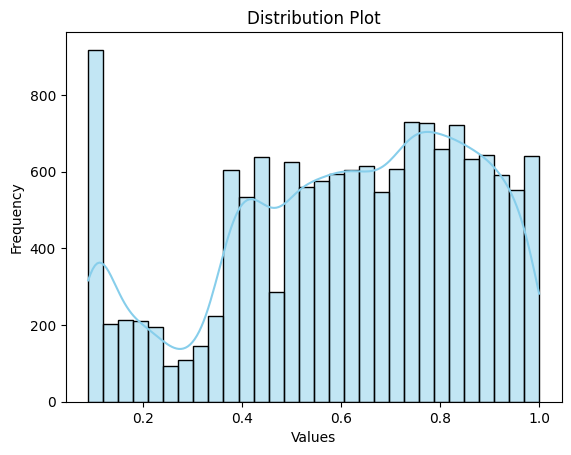

In [20]:
sns.histplot(df_hr['satisfaction_level'], kde=True, color='skyblue')  # kde=True adds a kernel density estimate
plt.title('Distribution Plot')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

Employee Evaluation (use column last_evaluation)

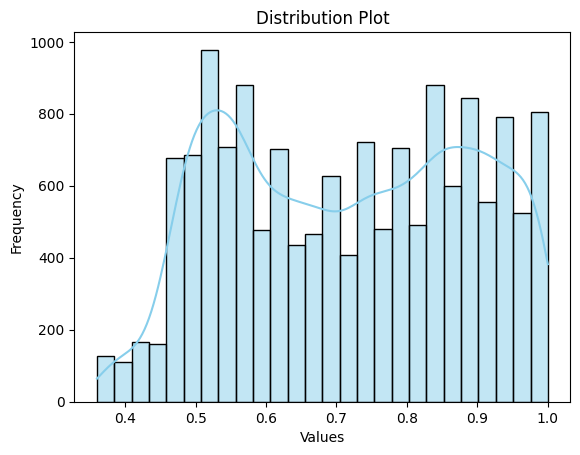

In [21]:
sns.histplot(df_hr['last_evaluation'], kde=True, color='skyblue')
plt.title('Distribution Plot')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

####Employee Average Monthly Hours (use column average_montly_hours)

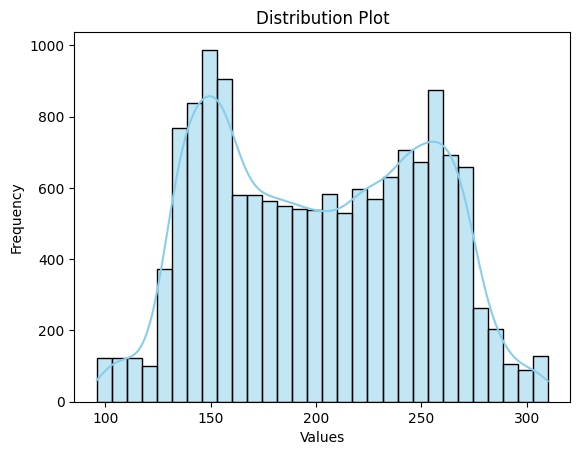

In [22]:
sns.histplot(df_hr['average_montly_hours'], kde=True, color='skyblue')
plt.title('Distribution Plot')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

2.3 Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot.

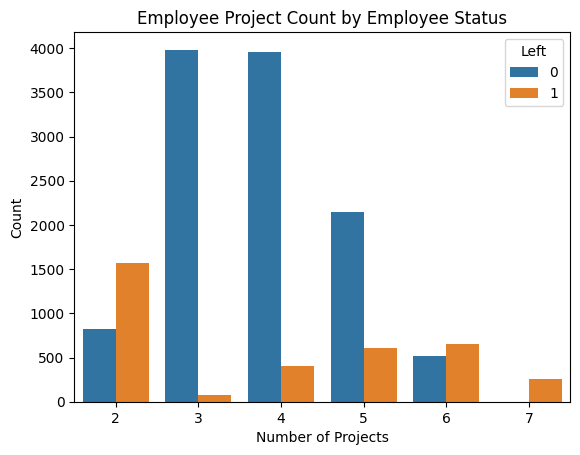

In [23]:
sns.countplot(x='number_project', hue='left', data=df_hr)
plt.title('Employee Project Count by Employee Status')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend(title='Left')
plt.show()

* 0 : employee stays in the company
* 1 : employee left the company

* We can see that the employees worked in projects 3,4 are less prone to leaving the company.

In [24]:
df_hr['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

3. Perform clustering of Employees who left based on their satisfaction and evaluation.
        3.1. Choose columns satisfaction_level, last_evaluation and left.
        3.2. Do KMeans clustering of employees who left the company into 3 clusters.
        3.3. Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

In [25]:
cols=['satisfaction_level', 'last_evaluation','left']
df_kmeans = df_hr[cols]


In [26]:
df_kmeans.head()

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1


In [27]:
from sklearn.cluster import KMeans

left_employees = df_kmeans[df_kmeans['left'] == 1]

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(left_employees.drop('left', axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [28]:
kmeans.labels_

array([0, 1, 2, ..., 0, 2, 0], dtype=int32)

In [29]:
left_employees['cluster'] = kmeans.labels_

<ipython-input-29-c6dc3b9a8326>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_employees['cluster'] = kmeans.labels_


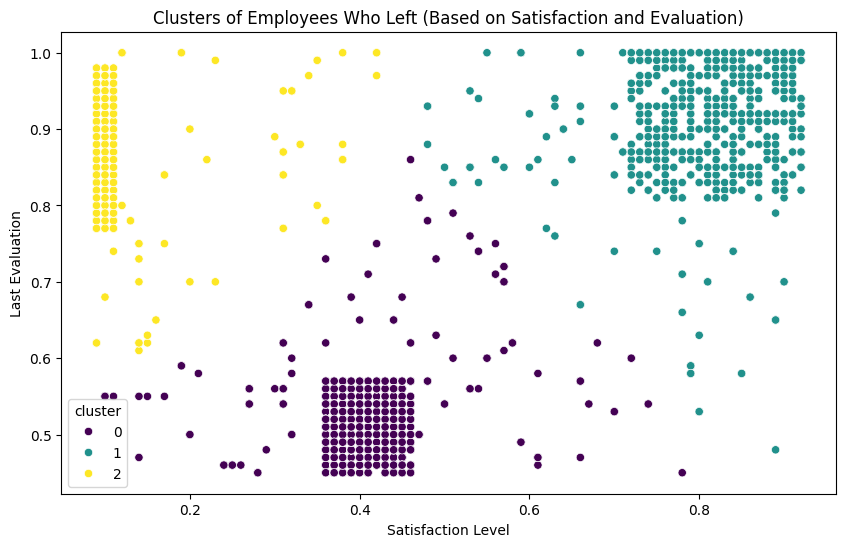

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=left_employees, palette='viridis', legend='full')
plt.title('Clusters of Employees Who Left (Based on Satisfaction and Evaluation)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()

    Cluster 1: Employees with high satisfaction and high evaluation scores who still left the company. These employees might have other reasons for leaving despite their high satisfaction and performance.
    Cluster 2: Employees with low satisfaction and low evaluation scores who left the company. These employees might be dissatisfied with their work and performance, leading to their departure.
    Cluster 3: Employees with moderate satisfaction and evaluation scores who left the company. These employees might have various reasons for leaving, such as seeking better opportunities or dissatisfaction with certain aspects of their job.

**** Clear observation is that High satisfaction level and given high ratings looks to be leaving the company might be because of the other reasons , where cluster shows high.****

    4. Handle the left Class Imbalance using SMOTE technique.
        4.1. Pre-Process the data by converting categorical columns to numerical columns by
            ▪ Separating categorical variables and numeric variables.
            ▪ Applying get_dummies() to the categorical variables.
            ▪ Combining categorical variables and numeric variables.
        4.2. Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.
        4.3. Upsample the train dataset using SMOTE technique from the imblearn module.

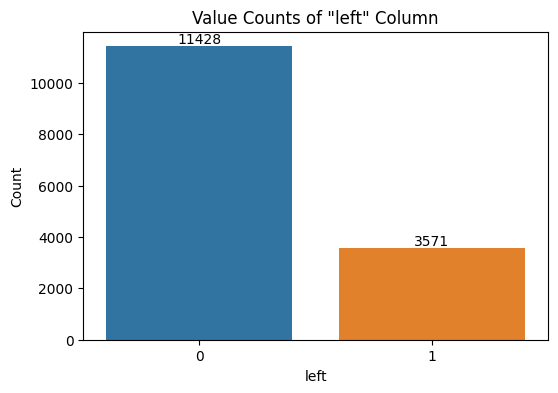

In [31]:
left_counts = df_hr['left'].value_counts()
colors = ["#1f77b4", "#ff7f0e"]
plt.figure(figsize=(6, 4))
sns.countplot(x='left', hue='left', data=df_hr, palette=colors, legend=False)
plt.title('Value Counts of "left" Column')
plt.xlabel('left')
plt.ylabel('Count')

# Add label count to the plot
for i, count in enumerate(df_hr['left'].value_counts()):
    plt.text(i, count + 100, str(count), ha='center')

plt.show()

4.1 : Pre-Process the data by converting categorical columns to numerical columns by
      ▪ Separating categorical variables and numeric variables.
      ▪ Applying get_dummies() to the categorical variables.
      ▪ Combining categorical variables and numeric variables.

In [32]:
numerical_cols = df_hr.select_dtypes(include=['number']).columns
categorical_cols = df_hr.select_dtypes(exclude=['number']).columns

In [33]:
print('Categorical columns : ',categorical_cols)
print('Numerical columns : ',numerical_cols)

Categorical columns :  Index(['sales', 'salary'], dtype='object')
Numerical columns :  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')


In [34]:
df_encoded = pd.get_dummies(df_hr,columns=categorical_cols)
df_encoded.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


#### considering target variable i.e y as left , others as X let us split the data into 80:20

In [35]:

y = df_encoded['left']
X = df_encoded.drop(columns=['left'],axis=1)

In [36]:
X.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

In [38]:
y_train.value_counts()

0    9142
1    2857
Name: left, dtype: int64

In [39]:
y_test.value_counts()

0    2286
1     714
Name: left, dtype: int64

##### We can observe that the count of y class is imbalanced to overcome this we will use SMOTE

In [40]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=123,stratify=y_resampled)

In [41]:
y_resampled.value_counts()

1    11428
0    11428
Name: left, dtype: int64

In [42]:
X_resampled.shape

(22856, 20)


5. Perform 5-Fold cross-validation model training and evaluate performance.
        
        
        
*   5.1. Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.
*  5.2. Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.
* 5.3. Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.




In [43]:
model_lr = LogisticRegression(solver='liblinear')


kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=kfold)

print("Cross-validation scores:", cv_scores_lr)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores_lr.mean())
print("Standard deviation of CV scores:", cv_scores_lr.std())

Cross-validation scores: [0.80639869 0.80448455 0.80803938 0.80229696 0.79266958]
Mean CV score: 0.8027778326269754
Standard deviation of CV scores: 0.005405834589711641


#### Model is trained with the cross validation , so we can further test with the test data on the model.

### classification report with test data :

In [44]:
y_pred_cv = cross_val_predict(model_lr, X_train, y_train, cv=5)
report_lr = classification_report(y_train, y_pred_cv)
print("Classification report for Logistic Regression:\n", report_lr)

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      9142
           1       0.79      0.82      0.81      9142

    accuracy                           0.80     18284
   macro avg       0.80      0.80      0.80     18284
weighted avg       0.80      0.80      0.80     18284



## Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.

In [45]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()


kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=kfold)

print("Cross-validation scores:", cv_scores_rf)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores_rf.mean())
print("Standard deviation of CV scores:", cv_scores_rf.std())

Cross-validation scores: [0.9846869  0.98796828 0.98359311 0.98414001 0.98222101]
Mean CV score: 0.9845218605964761
Standard deviation of CV scores: 0.001908264517086447


In [46]:
y_pred_rf = cross_val_predict(model_rf, X_train, y_train, cv=5)
report_rf= classification_report(y_train, y_pred_rf)
print("Classification report for RandomForestClassifier:\n", report_rf)

Classification report for RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      9142
           1       0.99      0.98      0.99      9142

    accuracy                           0.99     18284
   macro avg       0.99      0.99      0.99     18284
weighted avg       0.99      0.99      0.99     18284



 #### 5.3 Train a Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()


kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_gb = cross_val_score(model_gb, X_train, y_train, cv=kfold)

print("Cross-validation scores:", cv_scores_gb)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores_gb.mean())
print("Standard deviation of CV scores:", cv_scores_gb.std())

Cross-validation scores: [0.96089691 0.96089691 0.96117036 0.96554553 0.96088621]
Mean CV score: 0.9618791843704917
Standard deviation of CV scores: 0.001836313337715306


In [48]:
y_pred_gb = cross_val_predict(model_gb, X_train, y_train, cv=5)
report_gb= classification_report(y_train, y_pred_gb)
print("Classification report for RandomForestClassifier:\n", report_gb)

Classification report for RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      9142
           1       0.98      0.95      0.96      9142

    accuracy                           0.96     18284
   macro avg       0.96      0.96      0.96     18284
weighted avg       0.96      0.96      0.96     18284



    6. Identify the best model and justify the evaluation metrics used.
        6.1. Find the ROC/AUC for each model and plot the ROC curve.
        6.2. Find the confusion matrix for each of the models.
        6.3. From the confusion matrix, explain which metric needs to be used- Recall or Precision?

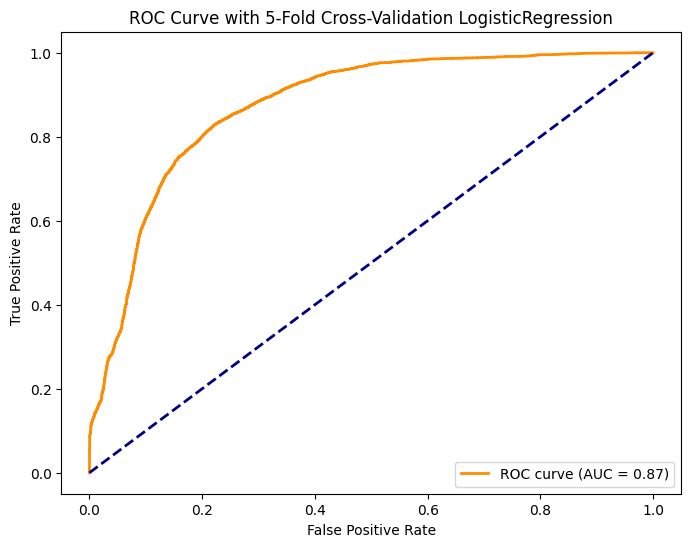

In [49]:
from sklearn.metrics import roc_curve, auc
# Perform 5-Fold Cross-Validation and obtain predicted probabilities
y_probs_lr = cross_val_predict(model_lr, X_train, y_train, cv=5, method='predict_proba')

# Compute ROC curve and AUC
fpr_lr, tpr_lr, thresholds = roc_curve(y_train, y_probs_lr[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 5-Fold Cross-Validation LogisticRegression')
plt.legend(loc='lower right')
plt.show()


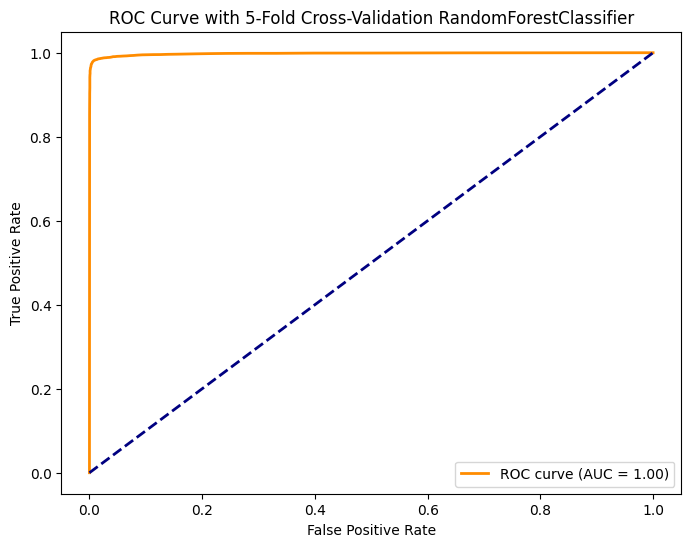

In [50]:
from sklearn.metrics import roc_curve, auc
# Perform 5-Fold Cross-Validation and obtain predicted probabilities
y_probs_rf = cross_val_predict(model_rf, X_train, y_train, cv=5, method='predict_proba')

# Compute ROC curve and AUC
fpr_rf, tpr_rf, thresholds = roc_curve(y_train, y_probs_rf[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 5-Fold Cross-Validation RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()


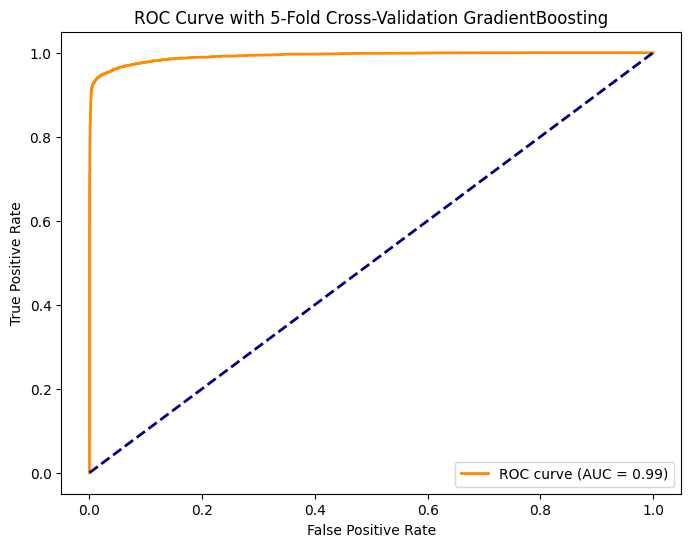

In [51]:

# Perform 5-Fold Cross-Validation and obtain predicted probabilities
y_probs = cross_val_predict(model_gb, X_train, y_train, cv=5, method='predict_proba')

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 5-Fold Cross-Validation GradientBoosting')
plt.legend(loc='lower right')
plt.show()


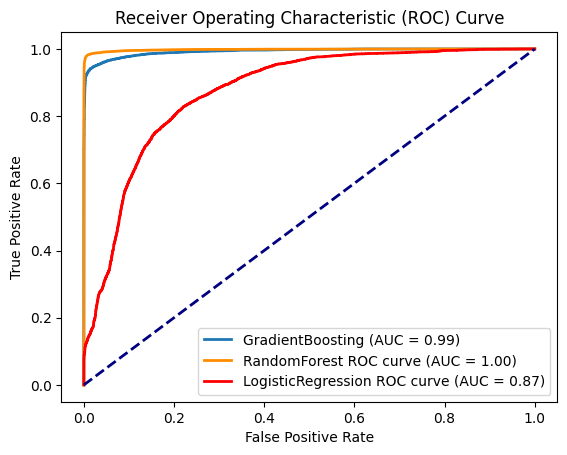

In [52]:
plt.plot(fpr, tpr, lw=2, label=f'GradientBoosting (AUC = {roc_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'RandomForest ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'LogisticRegression ROC curve (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.legend(loc='lower right')
plt.show()

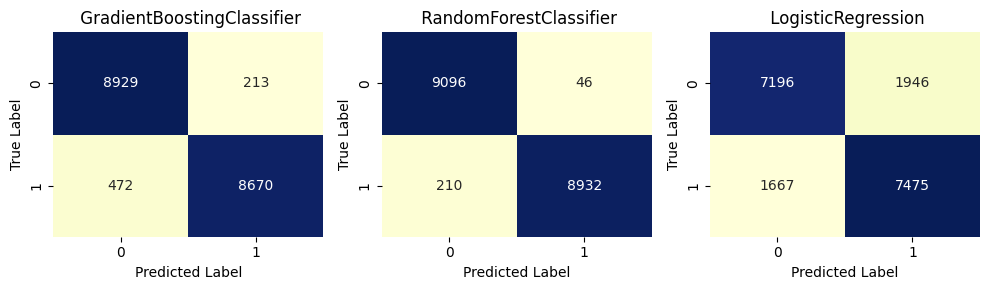

In [53]:
from sklearn.metrics import confusion_matrix

conf_matrix1 = confusion_matrix(y_train, y_pred_gb)
conf_matrix2 = confusion_matrix(y_train, y_pred_rf)
conf_matrix3 = confusion_matrix(y_train, y_pred_cv)
labels =['GradientBoostingClassifier','RandomForestClassifier','LogisticRegression']

conf_matrices = [conf_matrix1, conf_matrix2, conf_matrix3]

# Initialize subplots
fig, axes = plt.subplots(1, len(conf_matrices), figsize=(10, 3))

# Plot confusion matrix for each model
for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False, ax=axes[i])
    axes[i].set_title(f' {labels[i]}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

#### Observations :
* We can see that the RandomForestClassifier is performing better on the train data , but it may overfit the data .
* LogisticRegression though it is performing better on the train data , but we see GradientBoosterClassifier is doing better compared to all the three.



In [54]:
model_gb.fit(X_train,y_train)
y_pred_gb = model_gb.predict(X_test)

In [55]:
conf_matrix1 = confusion_matrix(y_test, y_pred_gb)

In [56]:
print(conf_matrix1)

[[2227   59]
 [ 114 2172]]


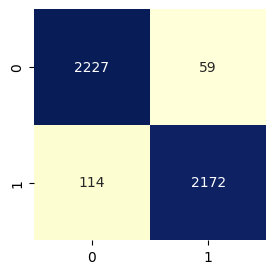

In [57]:
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.show()

In [58]:
y_pred_prob = model_gb.predict_proba(X_test)

In [59]:
print(y_pred_prob)

[[0.02544051 0.97455949]
 [0.97796116 0.02203884]
 [0.0408361  0.9591639 ]
 ...
 [0.01253681 0.98746319]
 [0.01444889 0.98555111]
 [0.98956201 0.01043799]]


In [60]:
y_pred_prob.shape

(4572, 2)

        7.2. Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
            ▪ Safe Zone (Green) (Score < 20%)
            ▪ Low Risk Zone (Yellow) (20% < Score < 60%)
            ▪ Medium Risk Zone (Orange) (60% < Score < 90%)
            ▪ High Risk Zone (Red) (Score > 90%).

In [61]:
y_pred_prob[:]

array([[0.02544051, 0.97455949],
       [0.97796116, 0.02203884],
       [0.0408361 , 0.9591639 ],
       ...,
       [0.01253681, 0.98746319],
       [0.01444889, 0.98555111],
       [0.98956201, 0.01043799]])

In [62]:
probability_scores=y_pred_prob[:,1]

In [70]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probability_scores)

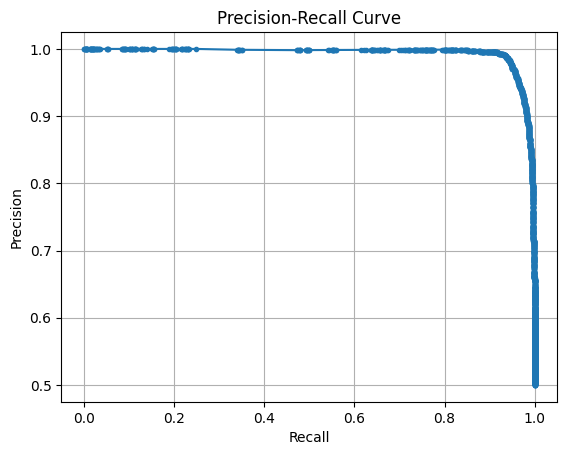

In [71]:
# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

* Points on the lower-left corner of the curve represent scenarios with low precision and high recall. These points correspond to low threshold values where the model is more liberal in making positive predictions, resulting in more true positives but potentially more false positives.


* Recall measures the proportion of true high-risk employees that are correctly identified among all actual high-risk employees. A higher recall means capturing more true high-risk employees, which can be beneficial if the goal is to prevent turnover at any cost and resources are available for broad retention efforts.

* Precision measures the proportion of true high-risk employees among all employees categorized as high risk. A higher precision means fewer false positives, which can be beneficial if resources for retention efforts are limited and you want to ensure they are directed towards employees who are truly at risk of turnover.

** In summary, the choice between using precision or recall depends on the specific objectives of the retention strategy, whether the emphasis is on minimizing false positives (precision) or capturing as many true positives as possible (recall). It's important to consider the trade-offs between precision and recall and how they align with the overall goals and resources available for retention efforts.

In [65]:
zones=[]
for score in probability_scores:
    if score < 0.20:
        zones.append("Safe Zone (Green)")
    elif 0.20 <= score < 0.60:
        zones.append("Low Risk Zone (Yellow)")
    elif 0.60 <= score < 0.90:
        zones.append("Medium Risk Zone (Orange)")
    else:
        zones.append("High Risk Zone (Red)")

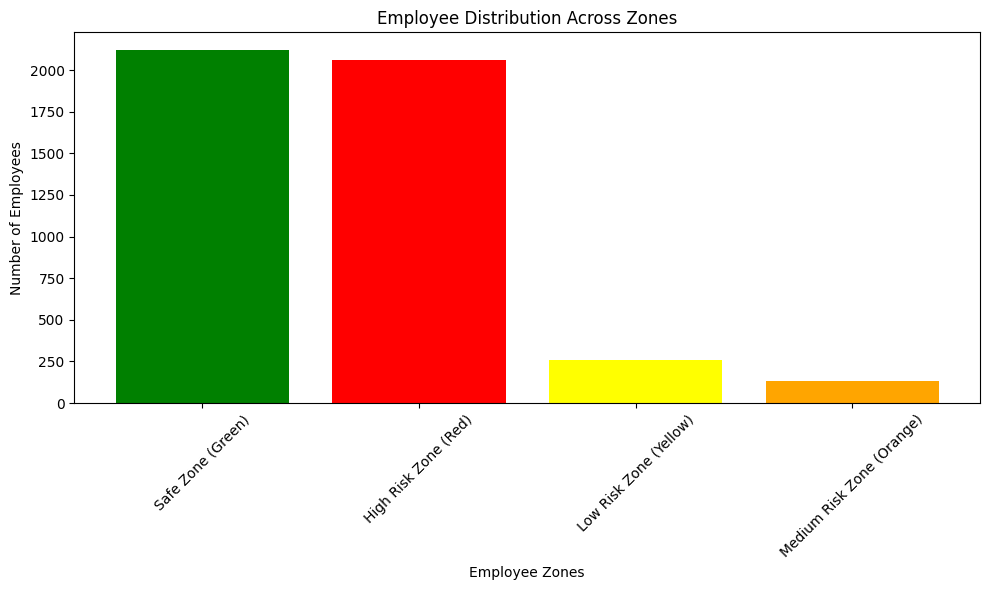

In [66]:
# Count the number of employees in each zone
zone_counts = {zone: zones.count(zone) for zone in set(zones)}

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(zone_counts.keys(), zone_counts.values(), color=['Green', 'Red', 'Yellow', 'orange'])
plt.xlabel('Employee Zones')
plt.ylabel('Number of Employees')
plt.title('Employee Distribution Across Zones')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

* Safe Zone (Green) (Score < 20%):

  * Employees in this zone have a low probability of turnover.
Retention strategies:
  Focus on employee recognition and rewards to maintain motivation and job satisfaction.
  Provide opportunities for skill development and career growth to keep employees engaged.
  Ensure a positive work-life balance and a supportive work environment.

* Low Risk Zone (Yellow) (20% < Score < 60%):

  * Employees in this zone have a moderate probability of turnover.
  Retention strategies:
    Regularly check in with employees to understand their needs and concerns.
    Offer flexible work arrangements or additional benefits to improve job satisfaction.
    Provide opportunities for advancement and professional development to increase loyalty and engagement.


* Medium Risk Zone (Orange) (60% < Score < 90%):

  * Employees in this zone have a higher probability of turnover.
Retention strategies:
Conduct stay interviews to identify areas of improvement and address any concerns.
Implement mentorship programs or coaching sessions to support career growth and skill enhancement.
Offer competitive compensation packages and performance-based incentives to increase employee retention.

* High Risk Zone (Red) (Score > 90%):

  * Employees in this zone have a very high probability of turnover.
Retention strategies:
    Act quickly to address any dissatisfaction or concerns raised by employees.
    Provide personalized support and career counseling to identify potential retention solutions.
    Offer retention bonuses or incentives to encourage high-performing employees to stay.